# Plain-DNN for magnetic field 

## Navigating to the working directory containing the datasets and model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from platform import python_version
print(python_version())

3.7.12


## Checking the current working GPU

In [1]:
!nvidia-smi

Wed Mar 16 15:53:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 450.51.05    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:C1:00.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |  14283MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Loading the datasets and doing feature engineering 

In [224]:
# Loading out of training intervals datasets

import pickle
import os

# source_file_data_111 = '/content/drive/My Drive/part_C_all_1'
# os.chdir(source_file_data_111)

# with open('all_1_para', 'rb') as file_para:
#     para = pickle.load(file_para)
    
# with open('all_1_output_field', 'rb') as file_out:
#     output_field = pickle.load(file_out)
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Data_ellip_testing_time_DL'

os.chdir(source_file)

with open('para_ec_1m_test', 'rb') as file_para:
    para_1m = pickle.load(file_para)
    
with open('output_field_ec_1m_test', 'rb') as file_out:
    output_field_1m = pickle.load(file_out)


source_file_4m = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'

os.chdir(source_file_4m)

with open('para_4m', 'rb') as file_para:
    para = pickle.load(file_para)
    
with open('output_field_4m', 'rb') as file_out:
    output_field = pickle.load(file_out)

## Data cleaning

In [67]:
# cleaning data for the out of training intervals
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = np.array(para)
output_field_np = np.array(output_field)

para_np_1m = np.array(para_1m)
output_field_np_1m = np.array(output_field_1m)

index = 0

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np_1m[:, index] > lower)*(output_field_np_1m[:, index] < upper)

mask_index = np.where(mask)[0]

clean_0 = output_field_np_1m[:, index][mask]

para_0 = para_np_1m[mask_index]

#x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.20, shuffle=True)

## Clean 3 at once

In [229]:
# cleaning data for the out of training intervals
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = np.array(para)
output_field_np = np.array(output_field)

para_np_1m = np.array(para_1m)
output_field_np_1m = np.array(output_field_1m)

#clean axial component

index = 0

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np_1m[:, index] > lower)*(output_field_np_1m[:, index] < upper)

mask_index = np.where(mask)[0]

clean_0 = output_field_np_1m[mask_index]

para_0 = para_np_1m[mask_index]


#clean azimuthal
index = 1

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (clean_0[:, index] > lower)*(clean_0[:, index] < upper)

mask_index = np.where(mask)[0]

clean_1 = clean_0[mask_index]

para_1 = para_0[mask_index]

#clean radial
index = 2

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (clean_1[:, index] > lower)*(clean_1[:, index] < upper)

mask_index = np.where(mask)[0]

clean_2_all = clean_1[mask_index]

para_2_all = para_1[mask_index]

#x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.20, shuffle=True)

In [228]:
clean_0.shape

(743334, 3)

/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

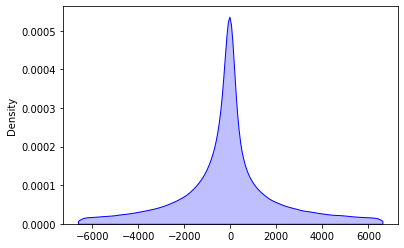

In [226]:
import seaborn as sns
sns.distplot(clean_0, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

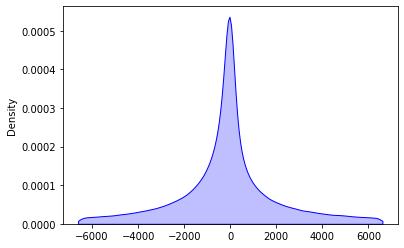

In [56]:
import seaborn as sns
sns.distplot(clean_0, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([ 17663.,  25021.,  39536.,  73847., 261862., 195996.,  57019.,
         33076.,  22613.,  16701.]),
 array([-6.61978637e+03, -5.29654870e+03, -3.97331104e+03, -2.65007337e+03,
        -1.32683571e+03, -3.59804126e+00,  1.31963962e+03,  2.64287729e+03,
         3.96611495e+03,  5.28935262e+03,  6.61259028e+03]),
 <BarContainer object of 10 artists>)

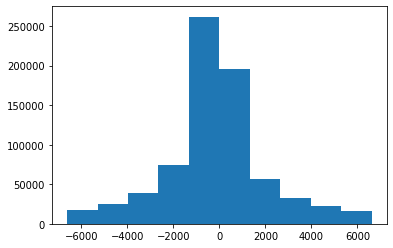

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(clean_0)
# plt.hist(output_field_np[:, 0])
#sns.distplot(output_field_np[:, 0], kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([90163., 84680., 80511., 77263., 73839., 71617., 69088., 67149.,
        65141., 63883.]),
 array([ 3.00005354,  7.70004701, 12.40004049, 17.10003396, 21.80002744,
        26.50002091, 31.20001439, 35.90000786, 40.60000134, 45.29999481,
        49.99998829]),
 <BarContainer object of 10 artists>)

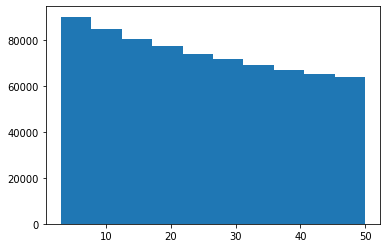

In [28]:
# mask = np.argwhere(output_field_np <= q3)
# mask.shape

from matplotlib import pyplot as plt

plt.hist(para_0[:,0])

#np.unique(output_field_np[:, 0], return_counts=True)


In [ ]:
output_field_np.shape

(2000000, 3)

## Feature engineering for clean data

In [232]:
#
# Feature engineering

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle
import os

random.seed(123)
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'

os.chdir(source_file)

with open('re_x_sScaler_ra', 'rb') as filename:
  x_sScaler_ax = pickle.load(filename)

with open('re_y_sScaler_ra', 'rb') as filename:
  y_sScaler_ax = pickle.load(filename)

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Data_ellip_testing_time_DL'

os.chdir(source_file)
# folder_ = os.path.join(source_file, 'new_data_IQR')
# os.chdir(folder_)

para_np_ = para_2_all #para_0 #np.array(para)
output_field_np_ = clean_2_all[:, 2] #clean_0 #np.array(output_field)

#q1, q3 = np.percentile(output_field_np, [5, 95])


m1_s_x_test_scaled = x_sScaler_ra.transform(para_np_)


m1_s_y_test_scaled = y_sScaler_ra.transform(output_field_np_.reshape(-1, 1))


# # Saving training, testing and scalers data




with open('m1_re_s_x_test_scaled_ra_c', 'wb') as filename:
  pickle.dump(m1_s_x_test_scaled, filename)

with open('m1_re_s_y_test_scaled_ra_c', 'wb') as filename:
  pickle.dump(m1_s_y_test_scaled, filename)

# with open('re_x_sScaler_az', 'wb') as filename:
#   pickle.dump(x_sScaler_az, filename)

# with open('re_y_sScaler_az', 'wb') as filename:
#   pickle.dump(y_sScaler_az, filename)

## Loading ready processed datasets

In [2]:
import pickle
import os

#source_file = '/content/drive/MyDrive/Data_and_model/Datasets_for_magfield/Dataset_4m'

#folder_ = os.path.join(source_file, 'new_data_IQR')

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Data_ellip_testing_time_DL'

os.chdir(source_file)

# Loading axial component
with open('m1_re_s_x_test_scaled_ax_c', 'rb') as filename: # _c ----> datasets to be used for all three components
  m1_re_s_x_test_scaled_ax = pickle.load(filename)

with open('m1_re_s_y_test_scaled_ax_c', 'rb') as filename:
  m1_re_s_y_test_scaled_ax = pickle.load(filename)

with open('re_x_sScaler_ax', 'rb') as filename:
  x_sScaler_ax = pickle.load(filename)

with open('re_y_sScaler_ax', 'rb') as filename:
  y_sScaler_ax = pickle.load(filename)

# Loading azimuthal component
with open('m1_re_s_x_test_scaled_az_c', 'rb') as filename:
  m1_re_s_x_test_scaled_az = pickle.load(filename)

with open('m1_re_s_y_test_scaled_az_c', 'rb') as filename:
  m1_re_s_y_test_scaled_az = pickle.load(filename)

with open('re_x_sScaler_az', 'rb') as filename:
  x_sScaler_az = pickle.load(filename)

with open('re_y_sScaler_az', 'rb') as filename:
  y_sScaler_az = pickle.load(filename)

# Loading radial component
with open('m1_re_s_x_test_scaled_ra_c', 'rb') as filename:
  m1_re_s_x_test_scaled_ra = pickle.load(filename)

with open('m1_re_s_y_test_scaled_ra_c', 'rb') as filename:
  m1_re_s_y_test_scaled_ra = pickle.load(filename)

with open('re_x_sScaler_ra', 'rb') as filename:
  x_sScaler_ra = pickle.load(filename)

with open('re_y_sScaler_ra', 'rb') as filename:
  y_sScaler_ra = pickle.load(filename)

# importing data for out of training intervals

# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [13]:
import numpy as np
np.round(x_sScaler_ax.inverse_transform(m1_re_s_x_test_scaled_ax), decimals=3)[15:25]

array([[ 14.675,  35.452,  26.547, 135.819,   1.728,  68.228,   0.   ,
          1.   ,   0.   ],
       [  3.936,  34.03 ,  37.487,  71.598,   0.269,  74.72 ,   0.   ,
          1.   ,   0.   ],
       [ 43.912,  44.902,  13.38 , 129.591,   2.912,  59.937,   0.   ,
          1.   ,   0.   ],
       [ 36.17 ,  45.343,   3.655, 109.477,   1.43 ,  58.159,   0.   ,
          0.   ,   1.   ],
       [ 10.897,  22.555,  22.974,  91.059,   3.122, -50.285,   1.   ,
          0.   ,   0.   ],
       [ 27.664,  38.901,  46.564, 125.946,   1.902,  54.851,   0.   ,
          1.   ,   0.   ],
       [ 16.275,   7.331,  23.807,  81.744,   1.755, -45.705,   0.   ,
          1.   ,   0.   ],
       [ 22.101,  40.201,   8.215,  85.501,   4.786,  -9.598,   0.   ,
          0.   ,   1.   ],
       [ 26.181,  12.14 ,  12.947,  36.197,   0.236,  61.504,   1.   ,
          0.   ,   0.   ],
       [ 46.575,   3.515,  33.842,  82.039,   0.263,  66.22 ,   1.   ,
          0.   ,   0.   ]])

In [ ]:
import numpy as np
min_ = np.min(s_y_train_scaled)
max_ = np.max(s_y_train_scaled)

out_min_ = np.min(out_y_scaled)
out_max_ = np.max(out_y_scaled)
print(f'Field interval for the training data is: [{min_}, {max_}]')
print(f'Field interval for the out of training intervals is: [{out_min_}, {out_max_}]')

Field interval for the training data is: [-23.610358434445427, 23.999540757658966]
Field interval for the out of training intervals is: [-2.3426246433144176, 2.2994854937939446]


In [ ]:
with open('out_para_200k', 'rb') as filename:
  out_para_scaled = pickle.load(filename)

In [ ]:
x_train.shape

(900000, 9)

## PlainDNN model development

In [5]:
# Plain DNN model


import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation


# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

class PlainDNNModel(tf.keras.Model):
    def __init__(self):
        
        super(PlainDNNModel, self).__init__()
        
        self.dense1_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense2_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense3_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_4 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_o = tf.keras.layers.Dense(1)

        
    def call(self, inputs):
        
        x_1 = self.dense1_1(inputs)
        x_1 = self.dense1_2(x_1)
        x_1 = self.dense1_3(x_1)

        
        x_2 = self.dense2_1(x_1)
        x_2 = self.dense2_2(x_2)
        x_2 = self.dense2_3(x_2)

        x_3 = self.dense3_1(x_2)
        x_3 = self.dense3_2(x_3)
        x_3 = self.dense3_3(x_3)
        x_3 = self.dense3_4(x_3)
        x_3 = self.dense3_o(x_3)
        
        
        return x_3
    


# PlainModel_ax = PlainDNNModel()  


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)

# PlainModel_ax.compile(optimizer=opt, loss='mse')


# PlainModel_az = PlainDNNModel()  


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)

# PlainModel_az.compile(optimizer=opt, loss='mse')



# PlainModel_ra = PlainDNNModel()  


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)

# PlainModel_ra.compile(optimizer=opt, loss='mse')

## Loading pre-trained model

In [10]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'
# Define a customised loss function



# Axial component
# source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ax')
# if os.getcwd != source_file_model:
#   os.chdir(source_file_model)

# PlainModel_ax = PlainDNNModel()  
# PlainModel_ax.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999 )
# #Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

# PlainModel_ax.compile(optimizer=opt, loss='mse') # the loss_func is good enough we don't need the loss_func_with_weights

# Azimuthal component
# source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_az')
# if os.getcwd != source_file_model:
#   os.chdir(source_file_model)

# PlainModel_az = PlainDNNModel()  
# PlainModel_az.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)
# #Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

# PlainModel_az.compile(optimizer=opt, loss='mse') # the loss_func is good enough we don't need the loss_func_with_weights

# # # Radial component
source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ra')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)

PlainModel_ra = PlainDNNModel()  
PlainModel_ra.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999 )
#Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

PlainModel_ra.compile(optimizer=opt, loss='mse') # the loss_func is good enough we don't need the loss_func_with_weights


In [26]:
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Data_ellip_testing_time_DL'

os.chdir(source_file)

# Loading axial component
with open('m1_re_s_x_test_scaled_az_c', 'rb') as filename:
  m1_re_s_x_test_scaled_az = pickle.load(filename)

with open('m1_re_s_y_test_scaled_az_c', 'rb') as filename:
  m1_re_s_y_test_scaled_az = pickle.load(filename)

with open('re_x_sScaler_az', 'rb') as filename:
  x_sScaler_az = pickle.load(filename)

with open('re_y_sScaler_az', 'rb') as filename:
  y_sScaler_az = pickle.load(filename)

In [42]:
import os
out_source = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Data_ellip_testing_time_DL/outtest_ec'

os.chdir(out_source)

with open('para_200k_outtest', 'rb') as filename:
  para_ec = pickle.load(filename)

with open('output_field_200k_outtest', 'rb') as filename:
  output_ec = pickle.load(filename)


In [51]:
para_ra = x_sScaler_ra.transform(np.array(para_ec))
output_ra = y_sScaler_ra.transform(np.array(output_ec)[:, 1].reshape(-1, 1))

In [52]:
out_pred_ra = PlainModel_ax.predict(para_ra)
r2_score(output_ra, out_pred_ra)

-0.7336659614196008

## Model testing

In [40]:
# Predicting the results
#m1_s_y_predicted_scaled_ax = PlainModel_ax.predict(m1_re_s_x_test_scaled_ax)

#m1_s_y_predicted_scaled_az = PlainModel_az.predict(m1_re_s_x_test_scaled_az)

m1_s_y_predicted_scaled_ra = PlainModel_ra.predict(m1_re_s_x_test_scaled_ra)

# Predicting the results
#y_predicted = PlainModel.predict(x_test)

In [35]:
m1_s_y_predicted_scaled_az.shape 

(400000, 1)

In [ ]:
out_y_predicted_scaled = PlainModel.predict(out_x_scaled)


In [12]:
# Testing the model
from sklearn.metrics import r2_score, mean_squared_error
r2ax = r2_score( m1_re_s_y_test_scaled_ax, m1_s_y_predicted_scaled_ax)
r2az = r2_score( m1_re_s_y_test_scaled_az, m1_s_y_predicted_scaled_az)
r2ra = r2_score( m1_re_s_y_test_scaled_ra, m1_s_y_predicted_scaled_ra)

print(f'ax: {r2ax}, az: {r2az}, ra: {r2ra}')

ax: 0.9997771780010225, az: 0.9996682169138927, ra: 0.9997978469489422


In [36]:
np.round(x_sScaler_ax.inverse_transform(m1_re_s_x_test_scaled_ax), decimals=3)[75:85]

array([[ 20.791,  11.948,   3.258, 110.813,   3.979,  69.778,   1.   ,
          0.   ,   0.   ],
       [ 47.928,  34.402,  14.603, 129.428,   2.145, -44.434,   1.   ,
          0.   ,   0.   ],
       [ 38.668,  33.042,  39.534, 147.464,   4.495, -72.234,   0.   ,
          0.   ,   1.   ],
       [ 38.325,  23.791,   4.704,  76.031,   2.997,   7.899,   1.   ,
          0.   ,   0.   ],
       [ 37.569,  26.396,  25.502, 147.946,   3.908, -57.755,   0.   ,
          0.   ,   1.   ],
       [  5.987,  37.895,  42.826,  99.158,   0.454,  62.291,   0.   ,
          0.   ,   1.   ],
       [  7.464,  14.044,  35.024,  55.899,   2.28 ,  56.785,   1.   ,
          0.   ,   0.   ],
       [  3.663,   5.983,  37.705,  41.945,   4.851,  28.758,   1.   ,
          0.   ,   0.   ],
       [ 14.526,  42.998,  45.971, 129.031,   1.315,  -9.47 ,   0.   ,
          0.   ,   1.   ],
       [ 39.771,   5.592,   8.074, 135.034,   2.455,   3.504,   0.   ,
          0.   ,   1.   ]])

In [37]:
np.set_printoptions(suppress=True)

y_pred_az = np.round(y_sScaler_az.inverse_transform(m1_s_y_predicted_scaled_az)[75:85], decimals=3)
y_test_az = np.round(y_sScaler_az.inverse_transform(m1_re_s_y_test_scaled_az)[75:85], decimals=3)

print(y_pred_az)
print(y_test_az)

[[  -54.844]
 [ 1513.398]
 [   -8.887]
 [  586.92 ]
 [  -31.493]
 [  -83.489]
 [ 1743.907]
 [-1928.435]
 [   60.426]
 [    0.473]]
[[  -54.875]
 [ 1513.193]
 [   -8.916]
 [  566.904]
 [  -22.628]
 [  -82.387]
 [ 1726.283]
 [-1931.424]
 [   58.822]
 [    0.1  ]]


In [38]:
np.set_printoptions(suppress=True)

y_pred_ax = np.round(y_sScaler_ax.inverse_transform(m1_s_y_predicted_scaled_ax)[75:85], decimals=3)
y_test_ax = np.round(y_sScaler_ax.inverse_transform(m1_re_s_y_test_scaled_ax)[75:85], decimals=3)

print(y_pred_ax)
print(y_test_ax)

[[  -69.857]
 [ 1031.184]
 [ -253.602]
 [ -780.79 ]
 [ -498.973]
 [ -866.644]
 [-2130.994]
 [  134.031]
 [-2157.198]
 [ -159.129]]
[[  -65.36 ]
 [ 1021.024]
 [ -272.149]
 [ -769.125]
 [ -489.307]
 [ -882.328]
 [-2102.138]
 [  133.37 ]
 [-2118.677]
 [ -154.37 ]]


In [39]:
np.set_printoptions(suppress=True)

y_pred_ra = np.round(y_sScaler_ra.inverse_transform(m1_s_y_predicted_scaled_ra)[75:85], decimals=3)
y_test_ra = np.round(y_sScaler_ra.inverse_transform(m1_re_s_y_test_scaled_ra)[75:85], decimals=3)

print(y_pred_ra)
print(y_test_ra)



[[  -59.044]
 [-1404.045]
 [-2566.598]
 [-5167.808]
 [-1375.316]
 [ 1513.803]
 [-1664.266]
 [  474.807]
 [-1974.7  ]
 [   -7.574]]
[[  -55.732]
 [-1393.374]
 [-2592.063]
 [-5185.802]
 [-1376.977]
 [ 1521.078]
 [-1685.091]
 [  482.092]
 [-1974.509]
 [   -1.902]]


In [55]:
np.average(error_az)

16.31908316971551

In [51]:
np.round(x_sScaler_ax.inverse_transform(m1_re_s_x_test_scaled_ax)[10:25], decimals=3)

array([[ 15.434,   5.022,  26.526, 143.419,   3.174,  38.717,   1.   ,
          0.   ,   0.   ],
       [ 39.946,  25.746,  37.336, 116.543,   1.614,  49.917,   0.   ,
          1.   ,   0.   ],
       [ 19.005,  45.981,  42.496, 138.744,   3.831, -74.106,   0.   ,
          1.   ,   0.   ],
       [ 19.858,  39.203,  19.123, 113.057,   5.155, -47.899,   1.   ,
          0.   ,   0.   ],
       [ 20.641,  15.478,  46.448, 128.45 ,   2.365, -64.626,   0.   ,
          1.   ,   0.   ],
       [ 14.675,  35.452,  26.547, 135.819,   1.728,  68.228,   0.   ,
          1.   ,   0.   ],
       [  3.936,  34.03 ,  37.487,  71.598,   0.269,  74.72 ,   0.   ,
          1.   ,   0.   ],
       [ 43.912,  44.902,  13.38 , 129.591,   2.912,  59.937,   0.   ,
          1.   ,   0.   ],
       [ 36.17 ,  45.343,   3.655, 109.477,   1.43 ,  58.159,   0.   ,
          0.   ,   1.   ],
       [ 10.897,  22.555,  22.974,  91.059,   3.122, -50.285,   1.   ,
          0.   ,   0.   ],
       [ 27.664,  38

In [48]:
np.average(error_ax)

1.6647391773520885

## Obtaining the same inpute features

In [196]:
mask_xzr = (x_sScaler_ax.inverse_transform(m1_re_s_x_test_scaled_ax[:700000, :]) == x_sScaler_az.inverse_transform(m1_re_s_x_test_scaled_az[:700000, :]))*(
    x_sScaler_ax.inverse_transform(m1_re_s_x_test_scaled_ax[:700000, :]) == x_sScaler_ra.inverse_transform(m1_re_s_x_test_scaled_ra[:700000, :]))

mask_i = np.where(mask_xzr)[0]


common_features_x = m1_re_s_x_test_scaled_ax[:700000, :][mask_i]


mask_xzr = (x_sScaler_az.inverse_transform(m1_re_s_x_test_scaled_az[:700000, :]) == x_sScaler_ax.inverse_transform(m1_re_s_x_test_scaled_ax[:700000, :]))*(
    x_sScaler_az.inverse_transform(m1_re_s_x_test_scaled_az[:700000, :]) == x_sScaler_ra.inverse_transform(m1_re_s_x_test_scaled_ra[:700000, :]))

mask_i = np.where(mask_xzr)[0]


common_features_z = m1_re_s_x_test_scaled_az[:700000, :][mask_i]


In [214]:
common_features_x[0]

array([-1.43709159, -1.31637572, -0.21204008, -1.76353301,  1.38900407,
       -1.48703146, -0.72876976, -0.72858764,  1.50470715])

In [223]:
common_features_x[5:]

array([[-1.43709159, -1.31637572, -0.21204008, -1.76353301,  1.38900407,
        -1.48703146, -0.72876976, -0.72858764,  1.50470715],
       [-1.43709159, -1.31637572, -0.21204008, -1.76353301,  1.38900407,
        -1.48703146, -0.72876976, -0.72858764,  1.50470715],
       [-1.43709159, -1.31637572, -0.21204008, -1.76353301,  1.38900407,
        -1.48703146, -0.72876976, -0.72858764,  1.50470715]])

In [175]:
m1_re_s_x_test_scaled_ax[:700000][mask_xzr][9:18]

array([-0.44090911, -1.43818048, -0.09305739,  0.69847628, -1.06781618,
        1.37217548, -0.72858764, -0.66458115,  1.41663112])

In [176]:
m1_re_s_x_test_scaled_ax[:700000][1]

array([-0.44090911, -1.43818048, -1.14910836, -0.09305739,  0.69847628,
       -1.06781618,  1.37217548, -0.72858764, -0.66458115])

In [153]:
mask_xzr[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [190]:
m1_s_y_predicted_scaled_ax = PlainModel_ax.predict(common_features)

m1_s_y_predicted_scaled_az = PlainModel_az.predict(common_features)

m1_s_y_predicted_scaled_ra = PlainModel_ra.predict(common_features)





In [191]:
from sklearn.metrics import r2_score, mean_squared_error
r2ax = r2_score( m1_re_s_y_test_scaled_ax[:700000][mask_i], m1_s_y_predicted_scaled_ax)
r2az = r2_score( m1_re_s_y_test_scaled_az[:700000][mask_i], m1_s_y_predicted_scaled_az)
r2ra = r2_score( m1_re_s_y_test_scaled_ra[:700000][mask_i], m1_s_y_predicted_scaled_ra)

print(f'ax: {r2ax}, az: {r2az}, ra: {r2ra}')

ax: 0.9993918953431249, az: -1.7690688613985572, ra: -1.2046590636490482


In [16]:
import scipy.stats as ss


ss.pearsonr(np.squeeze(s_y_test_scaled), np.squeeze(s_y_predicted_scaled))

(0.9993222308006319, 0.0)

In [ ]:
np.round(x_sScaler.inverse_transform(s_x_test_scaled)[10:20], decimals=2)

array([[ 2.2050e+01,  1.4740e+01,  1.8340e+01,  3.1970e+01,  5.3100e+00,
         5.1890e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.3800e+01,  9.7900e+00,  1.7100e+01,  1.3667e+02,  4.1400e+00,
        -4.5130e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.8060e+01,  1.5450e+01,  4.4830e+01,  9.6220e+01,  3.9000e+00,
         6.9680e+01,  0.0000e+00,  1.0000e+00,  0.0000e+00],
       [ 3.5800e+01,  1.4100e+01,  3.4900e+00,  3.9150e+01,  2.2300e+00,
         3.1740e+01,  0.0000e+00,  0.0000e+00,  1.0000e+00],
       [ 4.0550e+01,  4.5650e+01,  1.6580e+01,  1.3273e+02,  3.3700e+00,
        -1.4330e+01,  0.0000e+00,  1.0000e+00,  0.0000e+00],
       [ 3.2810e+01,  1.0640e+01,  3.0330e+01,  1.0670e+02,  3.2700e+00,
        -2.9860e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.4950e+01,  4.7220e+01,  3.6500e+00,  9.8010e+01,  1.3000e-01,
         3.0330e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.3850e+01,  1.0770e+01,  4.4720e+01,  7.3190e+01,  9

In [ ]:
np.round(y_sScaler.inverse_transform(s_y_predicted_scaled)[10:20], decimals=2)

array([[ 5485.96],
       [  181.69],
       [-2616.35],
       [  833.14],
       [  296.26],
       [ 1642.51],
       [  646.55],
       [-3013.74],
       [-1124.42],
       [ 6025.83]], dtype=float32)

In [ ]:
y_test = y_sScaler.inverse_transform(s_y_test_scaled)
np.round(y_test[10:20], decimals=2)

array([[ 5347.82],
       [  190.41],
       [-2604.41],
       [  859.41],
       [  318.97],
       [ 1611.42],
       [  650.14],
       [-2989.24],
       [ -851.69],
       [ 6157.46]])

In [18]:
y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled).astype(np.float32)
y_test = y_sScaler.inverse_transform(s_y_test_scaled).astype(np.float32)


In [19]:
from sklearn.metrics import r2_score, mean_squared_error

np.sqrt(mean_squared_error(y_test, y_sScaler.inverse_transform(s_y_predicted_scaled)))

81.58237

In [20]:
81.58/np.subtract(*np.percentile(y_test, [5, 95]))

-0.009799602336394693

In [21]:
np.subtract(*np.percentile(y_test, [5, 95]))

-8324.827600097655

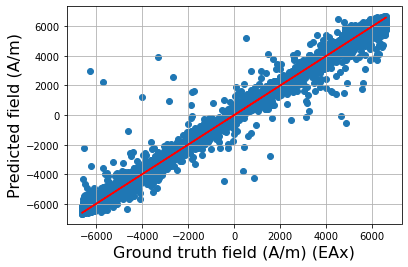

In [23]:
import matplotlib.pyplot as plt

y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled)
y_test = y_sScaler.inverse_transform(s_y_test_scaled)

a, b = np.polyfit(np.squeeze(y_test), np.squeeze(y_pred), 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, a*y_test+b, color='r')
plt.xlabel('Ground truth field (A/m) (EAx)', fontsize=16)
plt.ylabel('Predicted field (A/m)', fontsize=16)
plt.grid('on')

mean: 0.3948181004411412, std: 0.8969372939188645


/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


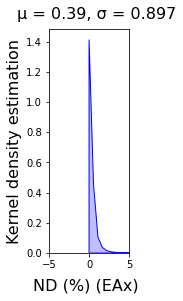

In [32]:
# Plotting pairs
# Not normalized
import seaborn as sns
index_ = 0

#vmin = np.min(s_y_test_scaled[:, index_])
#vmax = np.max(s_y_test_scaled[:, index_])
cmap = 'YlGnBu'
 # 0 for axial, 1 for azimuthal and 2 for radial components

height = [0.00148, 0.788, 0.00395]
low = [-0.000227, -0.12, -0.000588]
plt.figure(figsize=(10, 14))

interq_955 = np.subtract(*np.percentile(y_test, [95, 5]))
errors = abs(y_pred - y_test)*100/interq_955


# errors = (s_y_predicted_scaled[:, index_+1].reshape(400000,-1)-s_y_test_scaled[:, index_+1].reshape(400000,-1))*100/(
#     np.max(s_y_test_scaled[:, index_+1]) - np.min(s_y_test_scaled[:, index_+1]))



plt.subplot(342)
mean = np.mean(errors)
std = np.std(errors)

print('mean: {}, std: {}'.format(mean, std))

sns.distplot(errors, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')
#sns.kdeplot(data=errors, fill=True)
plt.xlim(-5, 5)
plt.text(-7, -0.25, 'ND (%) (EAx)', fontsize=16)
#plt.text(-20, 1.6*low[index_+1], 'j) Azimuthal component', fontsize=12)
# #plt.xlabel('b) Azimuthal component', fontsize=12)
plt.ylabel('Kernel density estimation', fontsize=16)
plt.text(-9, 1.55, '\u03BC = {:2.2}, \u03C3 = {:2.3}'.format(mean, std), fontsize=16) # height index_ .2 for axial; = 6.5 for azimuthal and .42 for radial
# #plt.tight_layout(rect=(0., 0., 1, 1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1., hspace=None)








